# 1) Rule-Based Matching

Compared to using regular expressions on raw text, spaCy’s rule-based matcher engines and components not only let you find the words and phrases you’re looking for – they also give you access to the tokens within the document and their relationships. This means you can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities in doc.ents.

원시 텍스트에 정규식을 사용하는 것과 비교할 때 spaCy의 규칙 기반 매처 엔진 및 구성 요소를 사용하면 원하는 단어와 구문을 찾을 수 있을 뿐만 아니라 문서 내의 토큰과 그 관계에 액세스할 수 있습니다. 즉, 주변 토큰에 쉽게 액세스 및 분석하고 범위를 단일 토큰으로 병합하거나 doc.ents의 명명된 엔터티에 항목을 추가할 수 있습니다.

[Demo For Rule based matching](https://explosion.ai/demos/matcher)

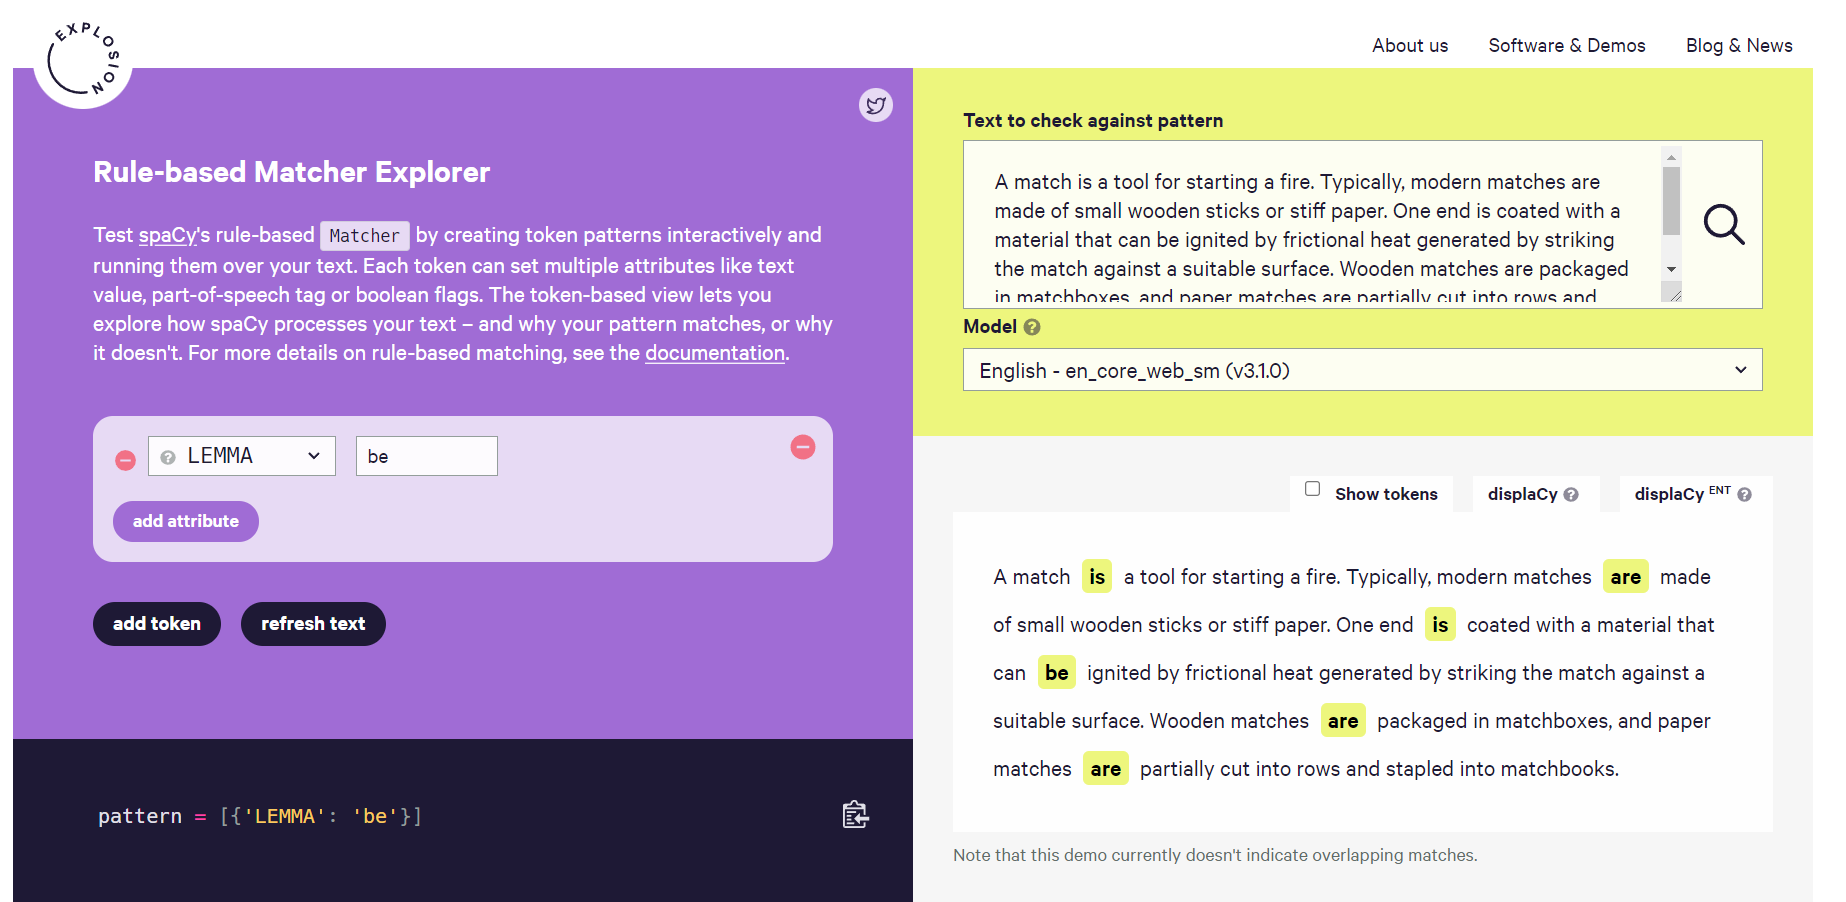

In [1]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211029_162550_2.png")

- LEMMA 라이브러리에서 be 으로 검색하였을때 be동사만 추출된다

[Spacy Docs](https://spacy.io/usage/rule-based-matching)

spaCy’s rule-based matcher engines and components not only let you find the words and phrases you’re looking for
,they also give you access to the tokens within the document and their relationships

This means you can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities in doc.ents

spaCy의 규칙 기반 매처 엔진 및 구성 요소를 사용하면 원하는 단어와 구문을 찾을 수 있을 뿐만 아니라
, 또한 문서 내의 토큰과 그 관계에 대한 액세스 권한을 제공합니다.

즉, 주변 토큰에 쉽게 액세스 및 분석하고 범위를 단일 토큰으로 병합하거나 doc.ents의 명명된 엔터티에 항목을 추가할 수 있습니다.

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
# ! pip install spacy-pattern-builder

In [4]:
# # ! pip install -U spacy
# print(spacy.__version__)
# ! python -m spacy validate

In [5]:
# Import the Matcher library
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab) # created matcher object and pass nlp.vocab

# Here matcher is an object that pairs to current Vocab object
# We can add and remove specific named matchers to matcher as needed

## Creating patterns

In [6]:
# create a list, and inside that list add series of dictionaries

# Hello World can appear in the following ways,
# 1) Hello World  hello world Hello WORLD
# 2) Hello-World

pattern_1 = [{'LOWER': 'hello'}, {'LOWER': 'world'}]
pattern_2 = [{'LOWER': 'hello'}, {'IS_PUNCT': True}, {'LOWER': 'world'}]

# 'LOWER', 'IS_PUNCT' are the attributes
# they has to be written in  that way only

In [10]:
# Add patterns to matcher object

# Add a match rule to matcher, A match rule consists of,
# 1) An ID key
# 2) an on_match callback
# 3) one or more patterns

matcher.add("hello world", [pattern_1])
matcher.add("hello world", [pattern_2])

In [11]:
# create a document

doc = nlp(" 'Hello World' are the first two printed words for Hello WORLD most of the programmers, printing 'Hello-World' is most common for beginners")

In [12]:
doc

 'Hello World' are the first two printed words for Hello WORLD most of the programmers, printing 'Hello-World' is most common for beginners

## finding the matches

In [13]:
find_matches = matcher(doc) # passin doc to matcher object and store this in a variable 
print(find_matches)

# it returns output list of tuples
# string ID, index start and index end

# doc 문장에 Hello World , Hello WORLD, Hello-World 총 3개 나옴
# id 숫자와 시작 주소와 끝주소

[(2758594965276909933, 2, 4), (2758594965276909933, 12, 14), (2758594965276909933, 21, 24)]


In [14]:
# define a function to find the matches

for match_id, start, end in find_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

2758594965276909933 hello world 2 4 Hello World
2758594965276909933 hello world 12 14 Hello WORLD
2758594965276909933 hello world 21 24 Hello-World


In [16]:
# Removing the matches
matcher.remove('hello world')

## Setting pattern options and quantifiers

In [33]:
# Redefine the patterns:
pattern_3 = [{'LOWER': 'hello'}, {'LOWER': 'world'}]
pattern_4 = [{'LOWER': 'hello'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'world'}]
# 'OP':'*' ----> Thisis going to allow this pattern to match zero or more times for any punctuation
#IS_PUNCT ----> Token is punctuation, whitespace, stop word.


# Add the new set of patterns to the 'Hellow World' matcher:
matcher.add('Hello World', [pattern_3])
matcher.add('Hello World', [pattern_4])

In [37]:
doc_2 = nlp("You can print Hello World or hello world or Hello-World")

In [38]:
find_matches = matcher(doc_2)
print(find_matches)

[(8585552006568828647, 3, 5), (8585552006568828647, 6, 8), (8585552006568828647, 9, 12)]


In [39]:
# define a function to find the matches

for match_id, start, end in find_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

8585552006568828647 Hello World 3 5 World'
8585552006568828647 Hello World 6 8 the first
8585552006568828647 Hello World 9 12 printed words for


# 2) Phrase Matching

In the above section we used token patterns to perform rule-based matching. An alternative and more efficient method is to match on terminology lists

In this case we use PhraseMatcher to create a Doc object from a list of phrases, and pass that into matcher instead


In [40]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [41]:
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [42]:
phrase_list = ["Barack Obama", "Angela Merkel", "Washington, D.C."]

In [43]:
# Convert each phrase to a document object
phrase_patterns = [nlp(text) for text in phrase_list] # to do that we are using list comprehension

In [44]:
phrase_patterns
# phrase objects are not strings

[Barack Obama, Angela Merkel, Washington, D.C.]

In [45]:
type(phrase_patterns[0])
# they are the spacy docs
# thats why we don't have any quotes there

spacy.tokens.doc.Doc

In [46]:
# pass each doc object into the matcher
matcher.add("TerminologyList", None, *phrase_patterns)
# thats we have to add asterisk mark before phrase_pattern

In [47]:
doc_3 = nlp("German Chancellor Angela Merkel and US President Barack Obama "
          "converse in the Oval Office inside the White House in Washington, D.C.")

In [48]:
find_matches = matcher(doc_3) # passin doc to matcher object and store this in a variable 
print(find_matches)

[(3766102292120407359, 2, 4), (3766102292120407359, 7, 9), (3766102292120407359, 19, 22)]


In [49]:
# define a function to find the matches

for match_id, start, end in find_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc_3[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

3766102292120407359 TerminologyList 2 4 Angela Merkel
3766102292120407359 TerminologyList 7 9 Barack Obama
3766102292120407359 TerminologyList 19 22 Washington, D.C.
